# Начинаем наш EDA анализ.
в конце будет небольшой вывод о проделанной работе.

In [5]:
# Загрузка всех нужных нам библиотек для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline

Установим сразу наши параметры для наших графиков

In [164]:
sns.set(font_scale=1,
        rc        ={'figure.figsize':(10,4)})

Считаем наши данные

In [165]:
df=pd.read_csv('K:\Новая папка\jupyter\Karpov\Python_lesson\Products.csv',encoding='windows-1251')

In [166]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Смотрим на правильность типов данных

In [167]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Создадим функция которая будет делать буквы строчными и с разделителем '_'

In [168]:
def to_lower_underscore (name):
    name=name.lower().replace(' ','_')
    return name

Переименуем колонки для более удобной работы

In [169]:
df.rename(columns=to_lower_underscore, inplace=True)

Смотрим информацию по нашим данным

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  sub-category   9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

Сделаем нужный формат пары столбцов

In [171]:
df['order_date']=pd.to_datetime(df['order_date'])
df['ship_date']=pd.to_datetime(df['ship_date'])

In [172]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

Проверяем на количество нуллей в коллонках и по надобности их заполняем

In [173]:
df.isna().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

Проверяем есть ли дубликаты в данных, которые могут изменить наше понимание о данных

In [174]:
df.duplicated().sum()

0

Посмотрим количество уникальных продуктовых продаж

In [175]:
df['product_name'].nunique()

1850

Проверим корелляцию между данными

In [176]:
df.corr()

,row_id,postal_code,sales,quantity,discount,profit
row_id,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
postal_code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


Посмотрим, статистики по данным

In [177]:
df.describe()

,row_id,postal_code,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


ТОП - 10 по Прибыли из городов.

In [242]:
df  .groupby('city',as_index=False) \
    .agg({'profit':'sum'}) \
    .sort_values('profit',ascending=False) \
    .nlargest(10,'profit') \
    .round(2)

,city,profit
329,New York City,62036.98
266,Los Angeles,30440.76
452,Seattle,29156.10
438,San Francisco,17507.39
123,Detroit,13181.79
233,Lafayette,10018.39
215,Jackson,7581.68
21,Atlanta,6993.66
300,Minneapolis,6824.58
437,San Diego,6377.20


Создаю датафрейм для удобной работы с данными в определенном разрезе

In [431]:
df_city=df  .groupby('city',as_index=False) \
    .agg({'profit':'sum'}) \
    .sort_values('profit',ascending=False) \
    .nlargest(20,'profit') \
    .round(2)

In [430]:
df_city_sales=df  .groupby('city',as_index=False) \
    .agg({'sales':'sum'}) \
    .sort_values('sales',ascending=False) \
    .nlargest(20,'sales') \
    .round(2)

# Рассмотрим наши данные в разрезе по городам

Прибыльность по городам

Text(0.5, 1.0, 'Топ 5 прибыльных городов в абсолютных значениях')

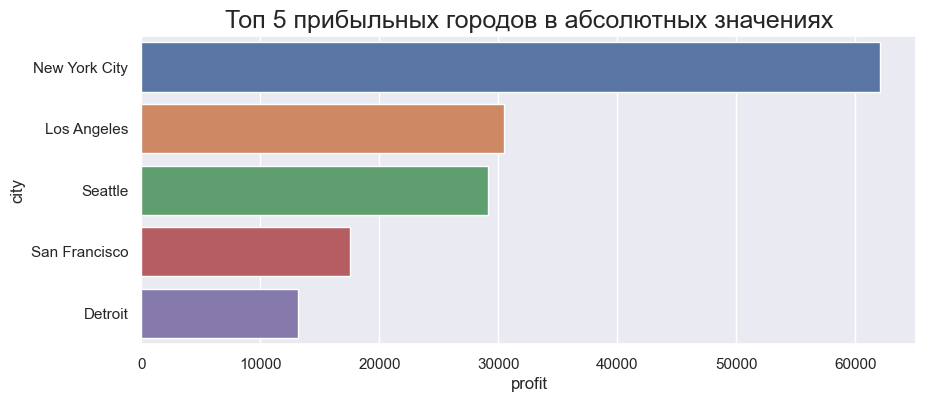

In [432]:
sns.barplot(data=df_city.nlargest(5,'profit'),y='city', x='profit') \
.set_title('Топ 5 прибыльных городов в абсолютных значениях', size=18)

Продажи по городам

Text(0.5, 1.0, 'Топ 5 продаж по городам в абсолютных значениях')

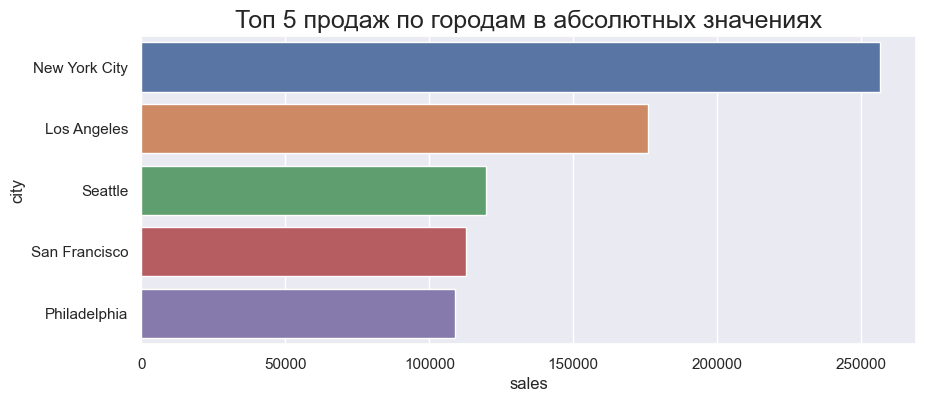

In [433]:
sns.barplot(data=df_city_sales.nlargest(5,'sales'),y='city', x='sales') \
.set_title('Топ 5 продаж по городам в абсолютных значениях', size=18)

Тут мы присоеденим таблицы друг к другу что бы найти % прибыли от продаж

In [277]:
merge_df=df_city.merge(df_city_sales,how= 'inner')

In [278]:
merge_df['profit_ratio']= merge_df['profit']/merge_df['sales']

In [352]:
merge_df=merge_df.sort_values('profit_ratio',ascending=False)

In [424]:
merge_df

,city,profit,sales,profit_ratio
5,Lafayette,10018.39,25036.20,0.400156
4,Detroit,13181.79,42446.94,0.310547
6,Jackson,7581.68,24963.86,0.303706
2,Seattle,29156.10,119540.74,0.243901
0,New York City,62036.98,256368.16,0.241984
11,Columbia,5606.12,25283.32,0.221732
12,Arlington,4169.70,20214.53,0.206272
10,Newark,5793.76,28576.12,0.202748
1,Los Angeles,30440.76,175851.34,0.173105
3,San Francisco,17507.39,112669.09,0.155388


Узнали % прибыльности относительно наших продаж, в разбивке по городам

Text(0.5, 1.0, 'Топ 5 городов по прибыльности в % отношении прибыли')

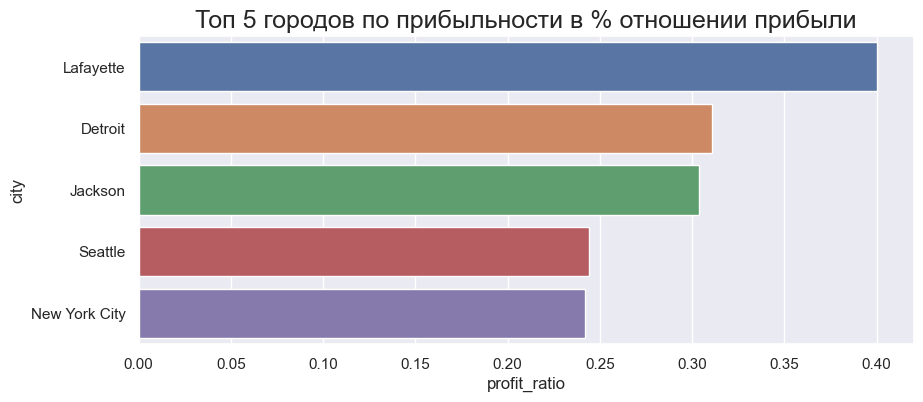

In [434]:
sns.barplot(data=merge_df.nlargest(5,'profit_ratio'),y='city', x='profit_ratio') \
.set_title('Топ 5 городов по прибыльности в % отношении прибыли', size=18)

# Рассмотрим наши данные в разрезе по Категориям

Смотрим на % соотношение прибыли наших категорий

<AxesSubplot:title={'center':'Соотношение Прибыли по категориям'}, ylabel='profit'>

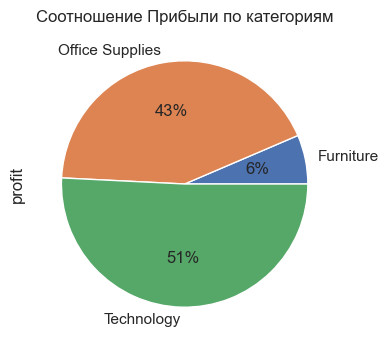

In [282]:
df.   groupby('category')  \
     .agg({'profit':'sum'}) \
     .plot(kind = 'pie', y='profit',autopct='%1.0f%%',legend=False, title='Соотношение Прибыли по категориям')

In [283]:
profit_category=df.   groupby('category',as_index=False)  \
     .agg({'profit':'sum'}) \
     .sort_values('profit',ascending=False)

Text(0.5, 1.0, 'Прибыль по категориям')

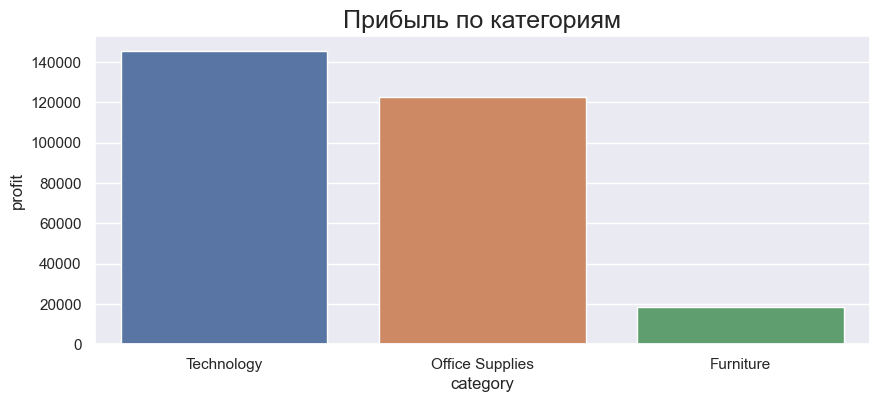

In [284]:
sns .barplot(data=profit_category,x='category',y='profit') \
    .set_title('Прибыль по категориям',size=18)

In [285]:
sales_category= \
df   .groupby('category',as_index=False)  \
     .agg({'sales':'sum'}) \
     .sort_values('sales',ascending=False)

Text(0.5, 1.0, 'Продажи по категориям')

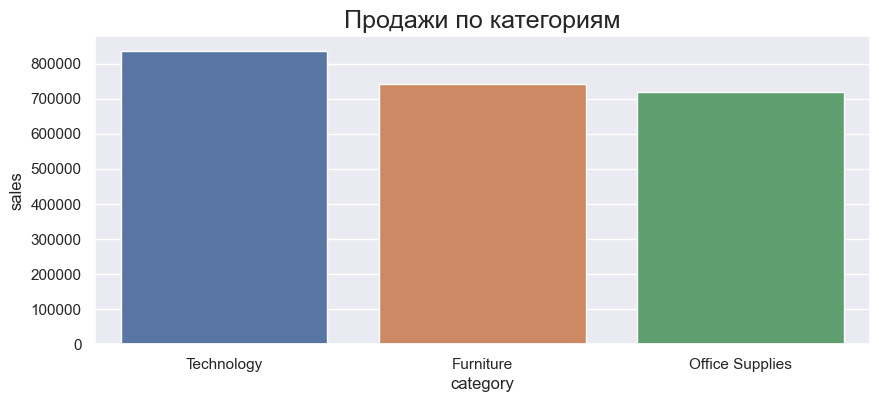

In [286]:
sns .barplot(data=sales_category,x='category',y='sales') \
    .set_title('Продажи по категориям',size=18)

# Рассмотрим так же наши продукты

Посмотрим ТОП - 10 по количеству продаж наших продуктов.

In [287]:
df.groupby('product_name',as_index=False) \
  .agg({'quantity':'sum'}) \
  .sort_values('quantity', ascending=False) \
  .nlargest(10,'quantity')

,product_name,quantity
1499,Staples,215
1493,Staple envelope,170
537,Easy-staple paper,150
1500,Staples in misc. colors,86
942,KI Adjustable-Height Table,74
259,Avery Non-Stick Binders,71
1511,Storex Dura Pro Binders,71
699,GBC Premium Transparent Covers with Diagonal L...,67
1450,"Situations Contoured Folding Chairs, 4/Set",64
1497,Staple-based wall hangings,62


In [288]:
top10_product=df.groupby('product_name',as_index=False) \
  .agg({'quantity':'sum'}) \
  .sort_values('quantity', ascending=False) \
  .nlargest(10,'quantity')

[Text(0.5, 1.0, 'Самые продаваемые продукты')]

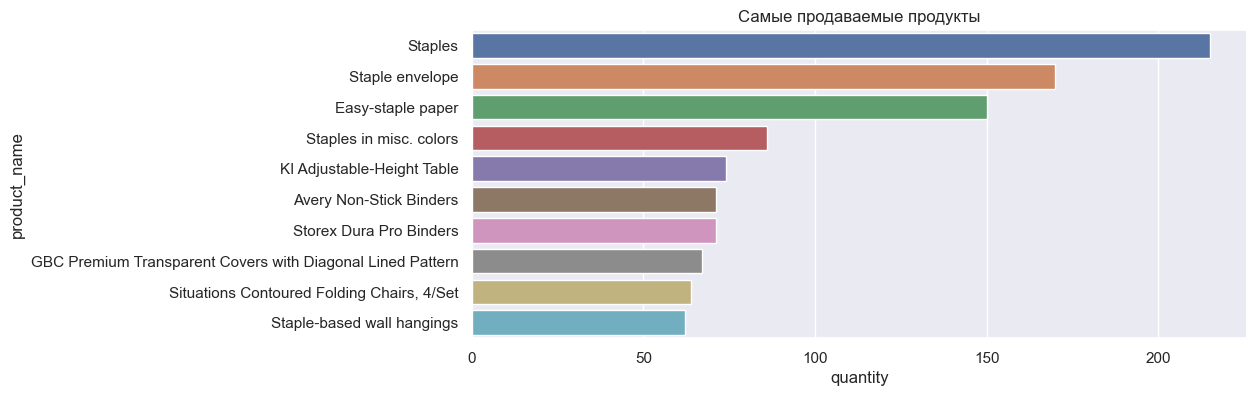

In [289]:
sns.barplot(data=top10_product,x='quantity',y='product_name') \
   .set(title='Самые продаваемые продукты')

Самые прибыльные продукты

In [290]:
most_profit_product=df.groupby('product_name',as_index=False) \
                        .agg({'profit':'sum'}) \
                        .sort_values('profit', ascending=False) \
                        .nlargest(10,'profit')

In [291]:
df.groupby('product_name',as_index=False) \
  .agg({'profit':'sum'}) \
  .sort_values('profit', ascending=False) \
  .nlargest(10,'profit')

,product_name,profit
404,Canon imageCLASS 2200 Advanced Copier,25199.9280
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
805,Hewlett Packard LaserJet 3310 Copier,6983.8836
400,Canon PC1060 Personal Laser Copier,4570.9347
787,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
165,Ativa V4110MDD Micro-Cut Shredder,3772.9461
19,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
1276,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
895,Ibico EPK-21 Electric Binding System,3345.2823
1840,Zebra ZM400 Thermal Label Printer,3343.5360


Text(0.5, 1.0, 'Самые прибыльные продукты')

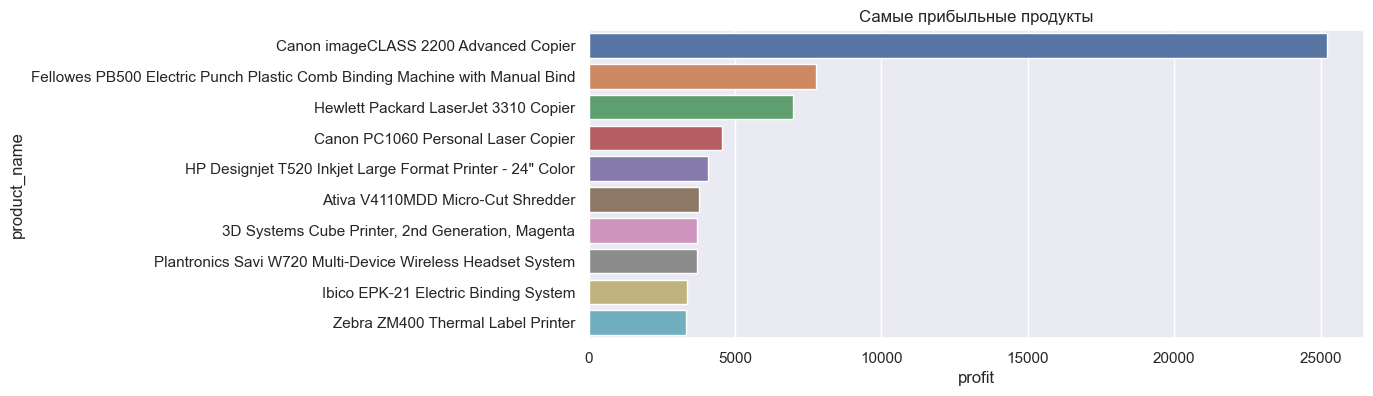

In [292]:
sns.barplot(data=most_profit_product, y='product_name', x='profit') \
    .set_title('Самые прибыльные продукты')

Посмотрим на какие продукты нам стоит обратить внимание или вовсе отказаться от них \
Те что не приносят нам прибыли

In [293]:
df.groupby('product_name',as_index=False) \
  .agg({'profit':'sum'}) \
  .query('profit<0') \
  .sort_values('profit', ascending=True)

,product_name,profit
475,Cubify CubeX 3D Printer Double Head Print,-8.879970e+03
985,Lexmark MX611dhe Monochrome Laser Printer,-4.589973e+03
476,Cubify CubeX 3D Printer Triple Head Print,-3.839990e+03
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2.876116e+03
376,Bush Advantage Collection Racetrack Conference...,-1.934398e+03
...,...,...
370,"Brites Rubber Bands, 1 1/2 oz. Box",-5.148000e-01
1359,Rubber Band Ball,-2.992000e-01
67,"Acco PRESSTEX Data Binder with Storage Hooks, ...",-1.614000e-01
1300,Premier Electric Letter Opener,-7.105427e-15


In [294]:
df_not_profit=df.groupby('product_name',as_index=False) \
  .agg({'profit':'sum'}) \
  .query('profit<=0') \
  .sort_values('profit',ascending=True) \
  .nsmallest(10,'profit')

Text(0.5, 1.0, 'Самые не прибыльные продукты')

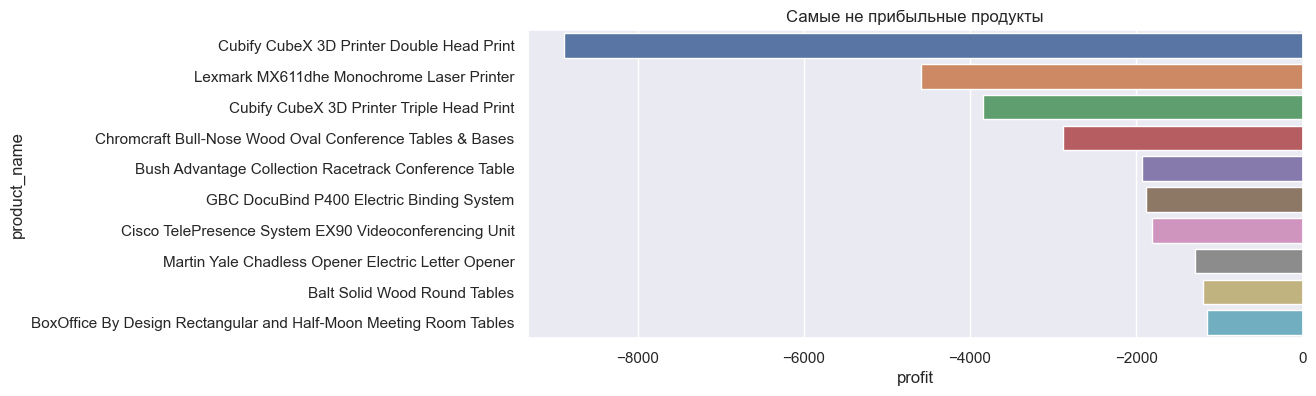

In [295]:
sns.barplot(data=df_not_profit, y='product_name', x='profit') \
    .set_title('Самые не прибыльные продукты')

# Под-категории

Самые продаваемые товары по под-категориям

In [296]:
df  .groupby('sub-category', as_index=False) \
    .agg({'sales':'sum'}) \
    .sort_values('sales',ascending=False) \
    .round(2) \
    .nlargest(10,'sales')

,sub-category,sales
13,Phones,330007.05
5,Chairs,328449.10
14,Storage,223843.61
16,Tables,206965.53
3,Binders,203412.73
11,Machines,189238.63
0,Accessories,167380.32
6,Copiers,149528.03
4,Bookcases,114880.00
1,Appliances,107532.16


In [297]:
df_sub_profit =df  .groupby('sub-category', as_index=False) \
    .agg({'sales':'sum'}) \
    .sort_values('sales',ascending=False) \
    .round(2) \
    .nlargest(10,'sales')

Text(0.5, 1.0, 'Самые продаваемые товары по под-категориям')

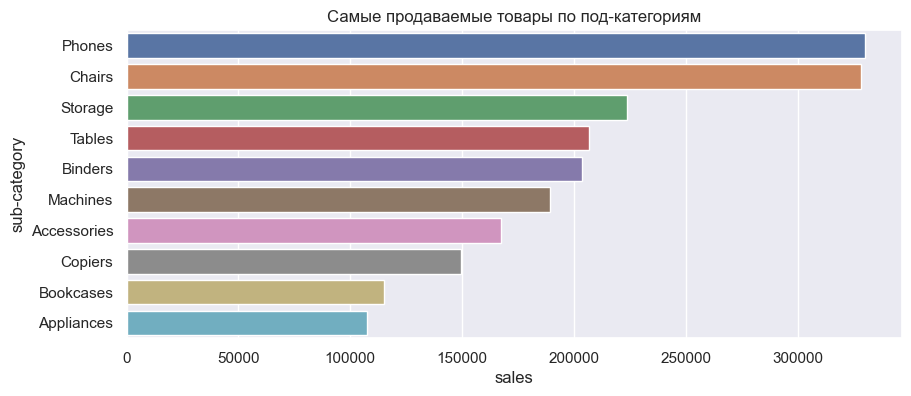

In [298]:
sns.barplot(data=df_sub_profit,y='sub-category',x='sales') \
    .set_title('Самые продаваемые товары по под-категориям')

Смотрим ТОП 10 прибыльных под категорий

In [299]:
df  .groupby('sub-category', as_index=False) \
    .agg({'profit':'sum'}) \
    .sort_values('profit',ascending=False) \
    .round(2) \
    .nlargest(10,'profit')

,sub-category,profit
6,Copiers,55617.82
13,Phones,44515.73
0,Accessories,41936.64
12,Paper,34053.57
3,Binders,30221.76
5,Chairs,26590.17
14,Storage,21278.83
1,Appliances,18138.01
9,Furnishings,13059.14
7,Envelopes,6964.18


In [300]:
df_sub_profit=df  .groupby('sub-category',as_index=False) \
    .agg({'profit':'sum'}) \
    .sort_values('profit',ascending=False) \
    .round(2) \
    .nlargest(10,'profit') \
    .rename(columns={'profit':'profits','sub-category':'sub_category'})

Text(0.5, 1.0, 'Самые прибыльные по под-категориям')

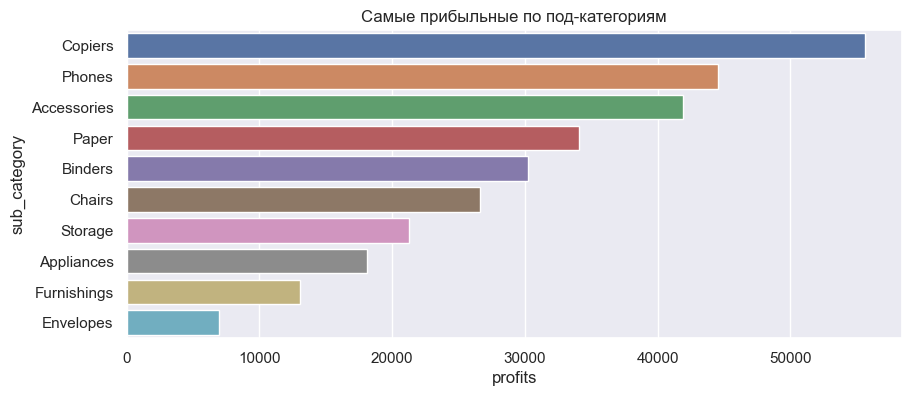

In [301]:
sns.barplot(data=df_sub_profit,y='sub_category',x='profits') \
    .set_title('Самые прибыльные по под-категориям')

# Относительно наших временных рядов рассмотрим наши данные

Рассмотрим какая тенденция продаж роста по годам

In [302]:
df_date_sales=df  .groupby('order_date',as_index=False) \
    .agg({'sales':'sum'}) \
    .sort_values('order_date',ascending=False)

In [303]:
df_date_sales['year']=df_date_sales['order_date'].dt.year
df_date_sales['month']=df_date_sales['order_date'].dt.month

In [304]:
df  .groupby('order_date',as_index=False) \
    .agg({'sales':'sum'}) \
    .sort_values('order_date',ascending=False)

,order_date,sales
1236,2017-12-30,713.7900
1235,2017-12-29,2915.5340
1234,2017-12-28,1657.3508
1233,2017-12-27,177.6360
1232,2017-12-26,814.5940
...,...,...
4,2014-01-07,87.1580
3,2014-01-06,4407.1000
2,2014-01-05,19.5360
1,2014-01-04,288.0600


Text(0.5, 1.0, 'Тенденция продаж по месяцам')

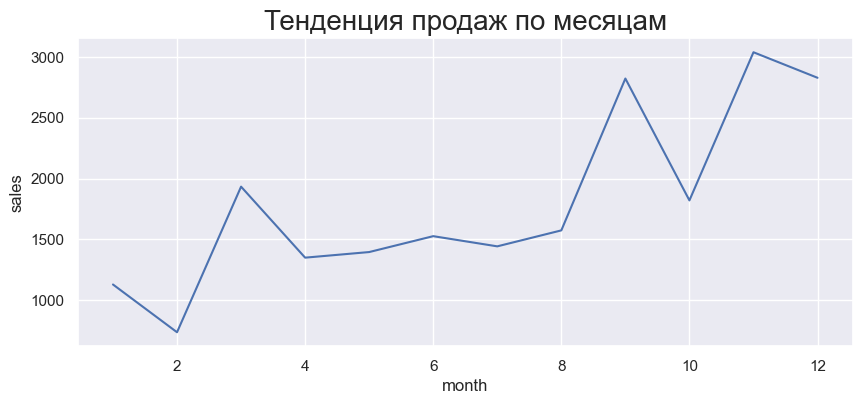

In [305]:
sns .lineplot(data=df_date_sales,x='month',y='sales',ci=None) \
    .set_title('Тенденция продаж по месяцам',size=20)

Text(0.5, 1.0, 'Тенденция продаж по годам')

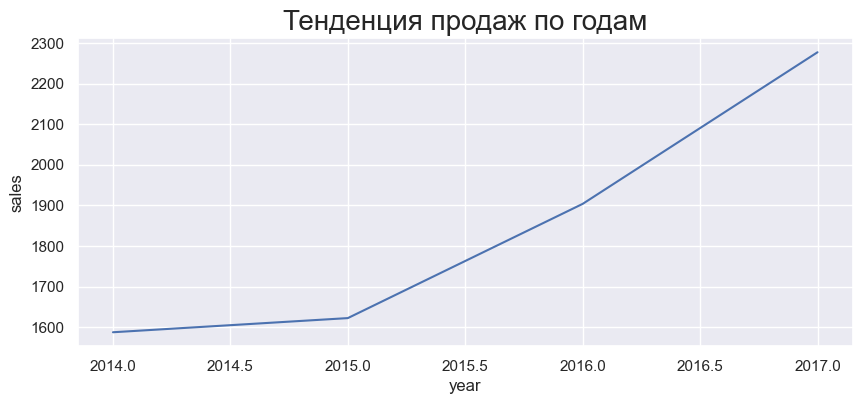

In [306]:
sns .lineplot(data=df_date_sales,x='year',y='sales',ci=None) \
    .set_title('Тенденция продаж по годам',size=20)

Смотрим рост прибыльности по годам

In [307]:
df  .groupby('order_date',as_index=False) \
    .agg({'profit':'sum'}) \
    .sort_values('order_date',ascending=False) \
    .query('profit>0')

,order_date,profit
1236,2017-12-30,101.5365
1235,2017-12-29,644.4338
1234,2017-12-28,253.1188
1232,2017-12-26,61.1202
1231,2017-12-25,359.2003
...,...,...
6,2014-01-10,22.6537
5,2014-01-09,10.9180
3,2014-01-06,1358.0524
2,2014-01-05,4.8840


In [308]:
df_date_profit=df  .groupby('order_date',as_index=False) \
                   .agg({'profit':'sum'}) \
                   .sort_values('order_date',ascending=False) \
                   .query('profit>0')

In [398]:
# Создаем колонки которые вытаскивают Года и Месяцы из даты
df_date_profit['year']=df_date_profit['order_date'].dt.year
df_date_profit['month']=df_date_profit['order_date'].dt.month

Узнали самый прибыльные месяца в годах

In [370]:
df_date_profit.groupby(['year','month'],as_index=False) \
                .agg({'profit':'mean'}) \
                .reset_index() \
                .sort_values('profit',ascending=False) \
                .head()

,index,year,month,profit
33,33,2016,10,947.839774
35,35,2016,12,671.729430
46,46,2017,11,664.263942
45,45,2017,10,643.885433
22,22,2015,11,635.171800


Узнаем на сколько в % соотношении увеличилась прибыль относительно нашего первого 2014 года

In [374]:
df_date_profit_year= \
df_date_profit  .groupby('year',as_index=False) \
                .agg({'profit':'mean'}) \
                .reset_index() \
                .sort_values('profit',ascending=False) \
                .head()

In [399]:
#Выводим колонку с прибылью за 2014 год
df_date_profit_year['profit_2014']=df_date_profit_year['profit'].min()

In [391]:
df_date_profit_year.head()

,index,year,profit,profit_2014
3,3,2017,468.526780,270.323279
2,2,2016,379.386578,270.323279
1,1,2015,345.523837,270.323279
0,0,2014,270.323279,270.323279


In [396]:
df_date_profit_year['increase_sales%']=df_date_profit_year.profit/df_date_profit_year.profit_2014*100

Выявили наше процентное соотношение от прибыли и теперь можем посмотреть что с 2014 по 2017 год 173% роста продаж

In [397]:
df_date_profit_year.head()

,index,year,profit,profit_2014,increase_sales,increase_sales%
3,3,2017,468.526780,270.323279,173.320915,173.320915
2,2,2016,379.386578,270.323279,140.345508,140.345508
1,1,2015,345.523837,270.323279,127.818751,127.818751
0,0,2014,270.323279,270.323279,100.000000,100.000000


Text(0.5, 0.98, 'Прибыль по месяцам, в сравнении со всеми Годами')

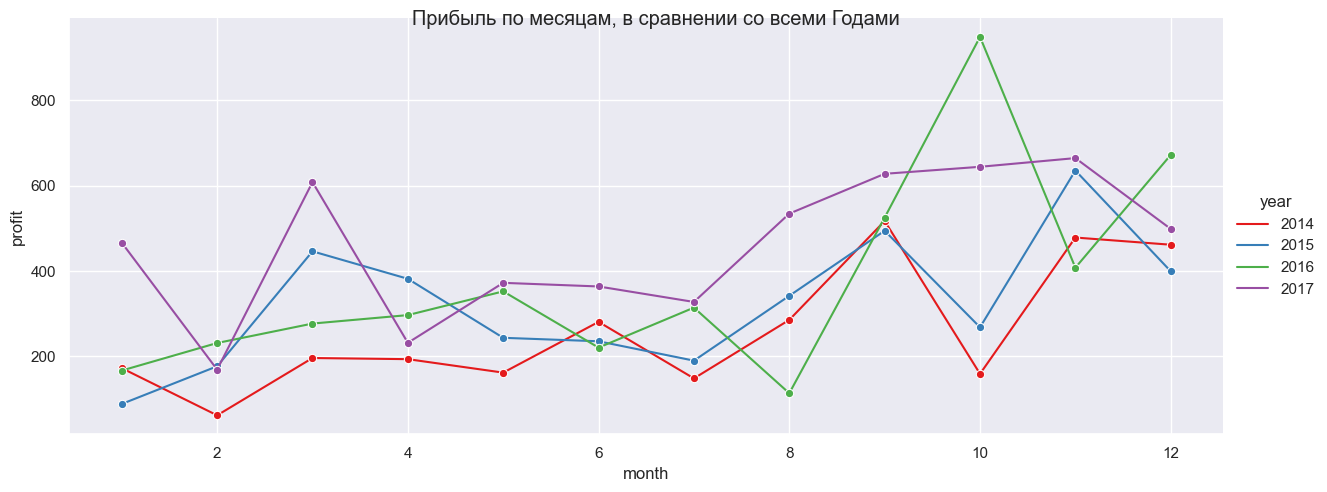

In [371]:
ax=sns.relplot(kind='line', data=df_date_profit, x='month', y='profit',hue='year',aspect=2.5, marker='o',ci=None,palette='Set1')
ax.fig.suptitle('Прибыль по месяцам, в сравнении со всеми Годами')

Text(0.5, 1.0, 'Тенденция прибыли по годам')

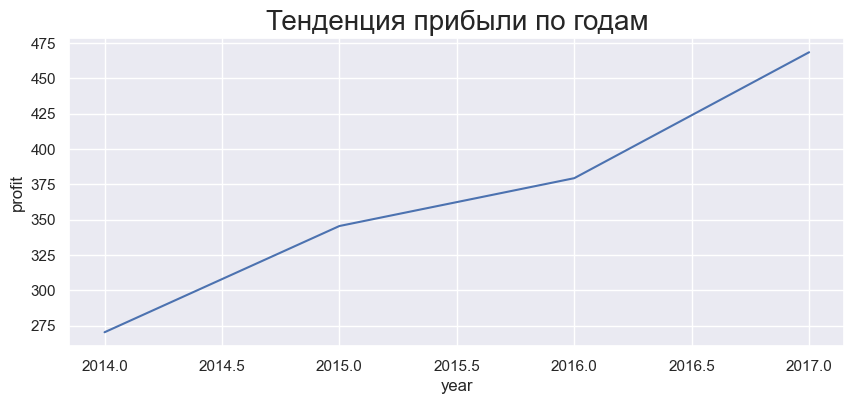

In [312]:
sns .lineplot(data=df_date_profit,x='year',y='profit',ci=None) \
    .set_title('Тенденция прибыли по годам',size=20)

# Влияение скидки на наш бизнесс

Узнаем как влияет процент скидки на продажи 

In [402]:
df  .groupby('discount', as_index=False) \
    .agg({'sales':'sum'}) \
    .sort_values('sales',ascending=False)

,discount,sales
0,0.00,1.087908e+06
3,0.20,7.645944e+05
6,0.40,1.164178e+05
4,0.30,1.032267e+05
8,0.50,5.891854e+04
1,0.10,5.436935e+04
10,0.70,4.062028e+04
2,0.15,2.755852e+04
11,0.80,1.696376e+04
5,0.32,1.449346e+04


In [314]:
discount_sales=df  .groupby('discount', as_index=False) \
                    .agg({'sales':'sum'}) \
                    .sort_values('sales',ascending=False)

In [315]:
fig=px.bar(discount_sales,
                       y=discount_sales['discount'],
                       x=discount_sales['sales'],
                       color='sales',
                       color_continuous_scale=['#87CEEB','blue','#191970'],
                       orientation='h',
                       title='Влияние скидки на продажи')
fig.update_layout(width=800, height=700)
fig.show()

In [316]:
discount_profit=df  .groupby('discount', as_index=False) \
                    .agg({'profit':'sum'}) \
                    .sort_values('profit',ascending=False)

In [317]:
discount_profit.head()

,discount,profit
0,0.00,320987.6032
3,0.20,90337.3060
1,0.10,9029.1770
2,0.15,1418.9915
5,0.32,-2391.1377


In [318]:
fig=px.bar(discount_profit,
                       y=discount_profit['discount'],
                       x=discount_profit['profit'],
                       color='profit',
                       color_continuous_scale=['#87CEEB','blue','#191970'],
                       orientation='h',
                       title='Влияние скидки на прибыль')
fig.update_layout(width=800, height=600)
fig.show()

# Рассмотрим данные в разрезе способов доставки

Узнаем, каким способом доставки больше всего продаж

In [320]:
df_pivot=df.pivot_table(index='segment',columns='ship_mode',values='sales',aggfunc='sum')

<AxesSubplot:xlabel='segment'>

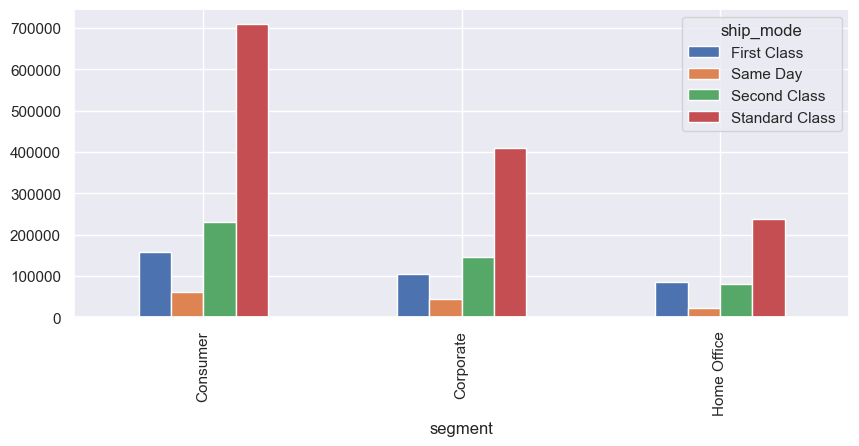

In [321]:
df_pivot.plot(kind='bar',stacked=False)

Узнаем прибыльность к 1 еденице разбитую по способу доставки

In [406]:
df_ship= \
df  .groupby('ship_mode',as_index=False) \
    .agg({'profit':'sum'}) \
    .sort_values('profit',ascending=False)

In [413]:
df_ships=df.groupby('ship_mode',as_index=False) \
                        .agg({'quantity':'sum'})

In [416]:
df_merge_ship=df_ship.merge(df_ships)

In [418]:
df_merge_ship['profit_per_1']=df_merge_ship.profit/df_merge_ship.quantity

In [419]:
df_merge_ship

,ship_mode,profit,quantity,profit_per_1
0,Standard Class,164088.7875,22797,7.197824
1,Second Class,57446.6354,7423,7.739005
2,First Class,48969.8399,5693,8.601764
3,Same Day,15891.7589,1960,8.108040


<AxesSubplot:xlabel='ship_mode', ylabel='sales'>

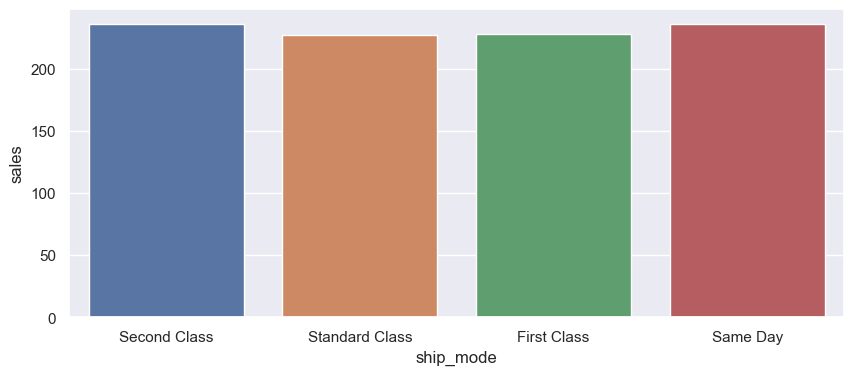

In [403]:
sns.barplot(data=df, x='ship_mode',y='sales',ci=None)

In [323]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

Узнаем количество покупателей по каждому региону

In [324]:
df_region_count=df.groupby('region',as_index=False) \
                    .agg({'customer_id':'count'})

<AxesSubplot:title={'center':'Соотношение количество клиентов по Регионам'}, ylabel='customer_id'>

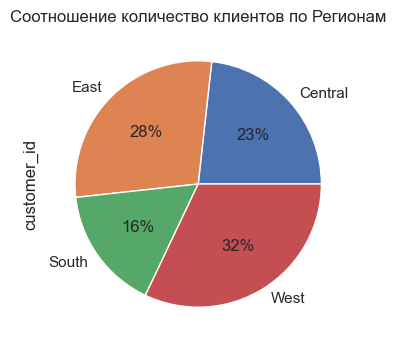

In [325]:
df.groupby('region') \
    .agg({'customer_id':'count'}) \
    .plot(kind = 'pie', y='customer_id',autopct='%1.0f%%',legend=False, title='Соотношение количество клиентов по Регионам')

<AxesSubplot:title={'center':'Соотношение Прибыли по Регионам'}, ylabel='profit'>

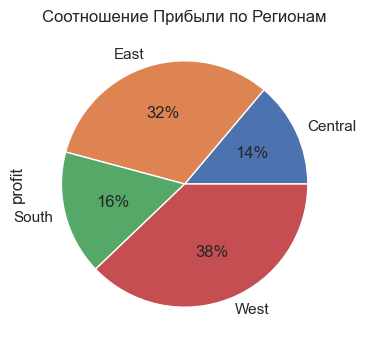

In [420]:
df.groupby('region') \
    .agg({'profit':'sum'}) \
    .plot(kind = 'pie', y='profit',autopct='%1.0f%%',legend=False, title='Соотношение Прибыли по Регионам')

# Поработаем с нашими покупателями

Посмотрим на покупателей который сделали больше всего покупок

In [326]:
df_cust_sales=df.groupby('customer_name',as_index=False) \
                .agg({'sales':'sum'}) \
                .sort_values('sales',ascending=False) \
                .nlargest(10,'sales')

In [327]:
df_cust_sales

,customer_name,sales
686,Sean Miller,25043.050
730,Tamara Chand,19052.218
622,Raymond Buch,15117.339
757,Tom Ashbrook,14595.620
6,Adrian Barton,14473.571
441,Ken Lonsdale,14175.229
671,Sanjit Chand,14142.334
334,Hunter Lopez,12873.298
672,Sanjit Engle,12209.438
156,Christopher Conant,12129.072


Text(0.5, 1.0, 'Топ 10 покупателей')

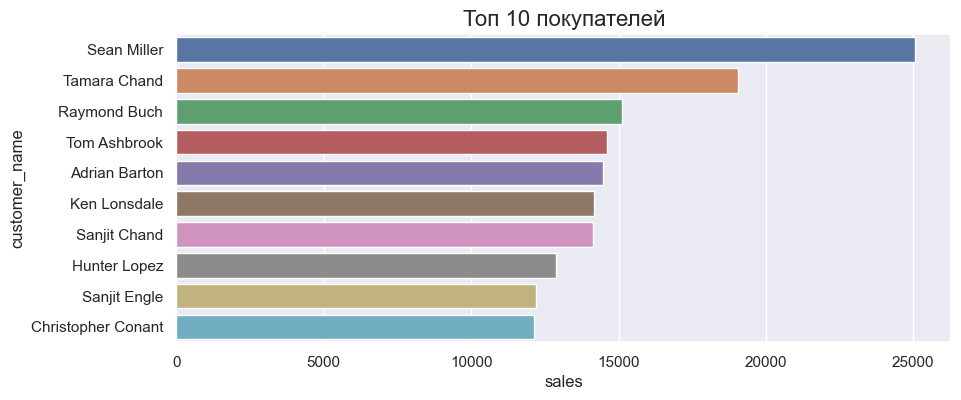

In [328]:
sns.barplot(data=df_cust_sales ,x='sales',y='customer_name') \
    .set_title('Топ 10 покупателей',size=16)

In [329]:
df_cust_profit=df.groupby('customer_name',as_index=False) \
                .agg({'profit':'sum'}) \
                .sort_values('profit',ascending=False) \
                .nlargest(10,'profit')

In [330]:
df_cust_profit

,customer_name,profit
730,Tamara Chand,8981.3239
622,Raymond Buch,6976.0959
671,Sanjit Chand,5757.4119
334,Hunter Lopez,5622.4292
6,Adrian Barton,5444.8055
757,Tom Ashbrook,4703.7883
157,Christopher Martinez,3899.8904
431,Keith Dawkins,3038.6254
35,Andy Reiter,2884.6208
194,Daniel Raglin,2869.0760


Text(0.5, 1.0, 'Топ клиентов по прибыли')

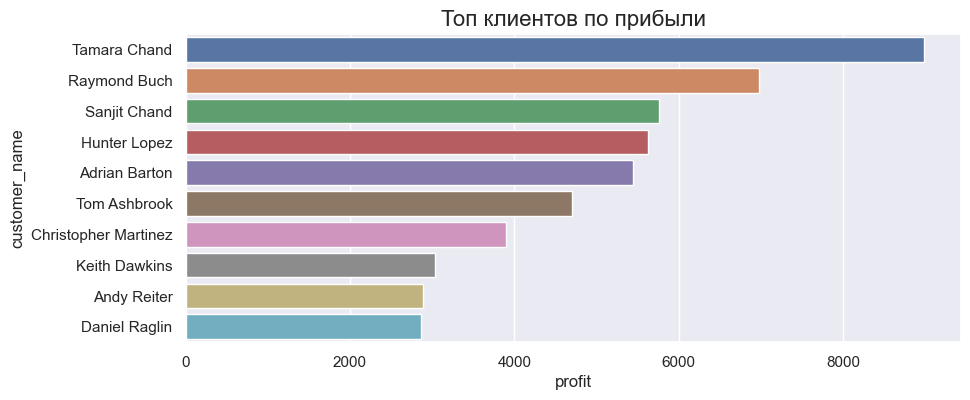

In [331]:
sns.barplot(data=df_cust_profit,x='profit',y='customer_name') \
    .set_title('Топ клиентов по прибыли',size=16)

Узнаем сколько всего покупок сделал наш главный клиент

In [332]:
df_tamara_chand_sales=df.query('customer_name=="Tamara Chand"').groupby('city', as_index=False) \
    .agg({'sales':'sum'}) \
    .sort_values('sales',ascending=False)

In [333]:
df_tamara_chand_profit=df.query('customer_name=="Tamara Chand"').groupby('city', as_index=False) \
    .agg({'profit':'sum'}) \
    .sort_values('profit',ascending=False)

In [334]:
df_tamara_chand_sales

,city,sales
2,Lafayette,18336.740
0,Decatur,521.920
1,Houston,100.398
3,Long Beach,85.848
4,Seattle,7.312


In [423]:
df_tamara_chand_profit

,city,profit
2,Lafayette,8762.3891
0,Decatur,195.9808
3,Long Beach,37.7204
4,Seattle,2.5592
1,Houston,-17.3256


Узнаем что большая часть продаж приходилось на город Lafayette

<AxesSubplot:xlabel='sales', ylabel='city'>

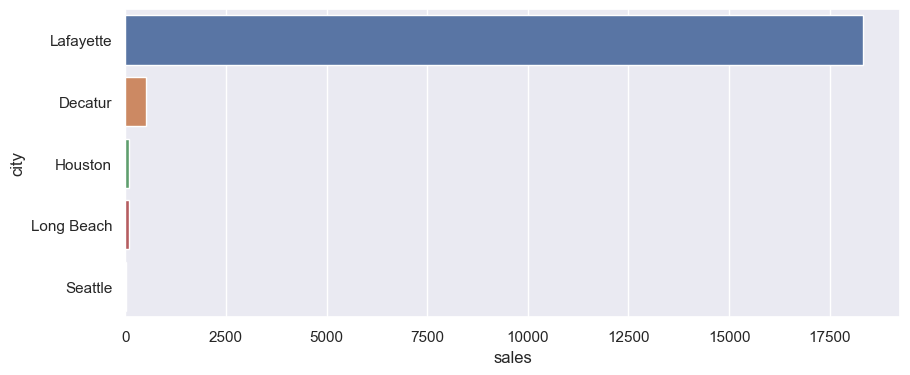

In [336]:
sns.barplot(data=df_tamara_chand_sales, x='sales',y='city')

И так же самый прибыльный город Lafayette

<AxesSubplot:xlabel='profit', ylabel='city'>

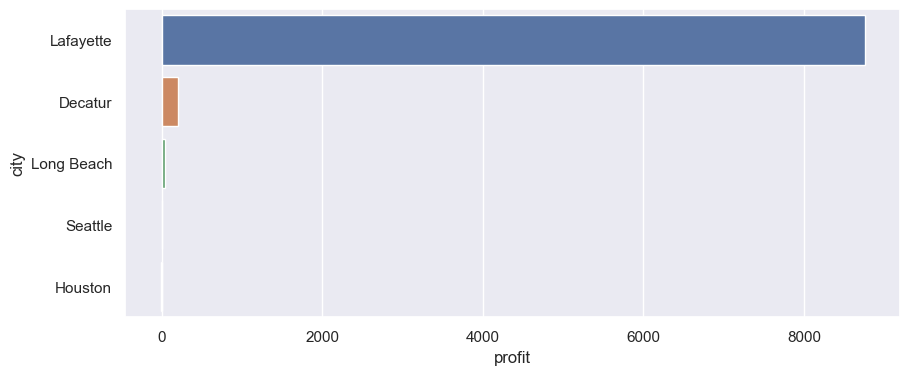

In [337]:
sns.barplot(data=df_tamara_chand_profit, x='profit', y='city')

Узнаем самый прибыльный товар

In [338]:
df_product_tamara=df.query('customer_name=="Tamara Chand"') \
    .groupby('product_name',as_index=False) \
    .agg({'profit':'sum'}) \
    .sort_values('profit',ascending=False)

In [339]:
df_product_tamara

,product_name,profit
2,Canon imageCLASS 2200 Advanced Copier,8399.9760
4,Ibico Ibimaster 300 Manual Binding System,331.1910
3,Enermax Acrylux Wireless Keyboard,184.2600
10,Xerox 1881,28.8580
9,Staple envelope,26.9526
1,"Acco Pressboard Covers with Storage Hooks, 14 ...",16.8413
11,Xerox 1983,11.7208
8,Stanley Bostitch Contemporary Electric Pencil ...,9.5088
6,Recycled Premium Regency Composition Covers,8.8624
0,Acco Perma 4000 Stacking Storage Drawers,4.8720


<AxesSubplot:xlabel='profit', ylabel='product_name'>

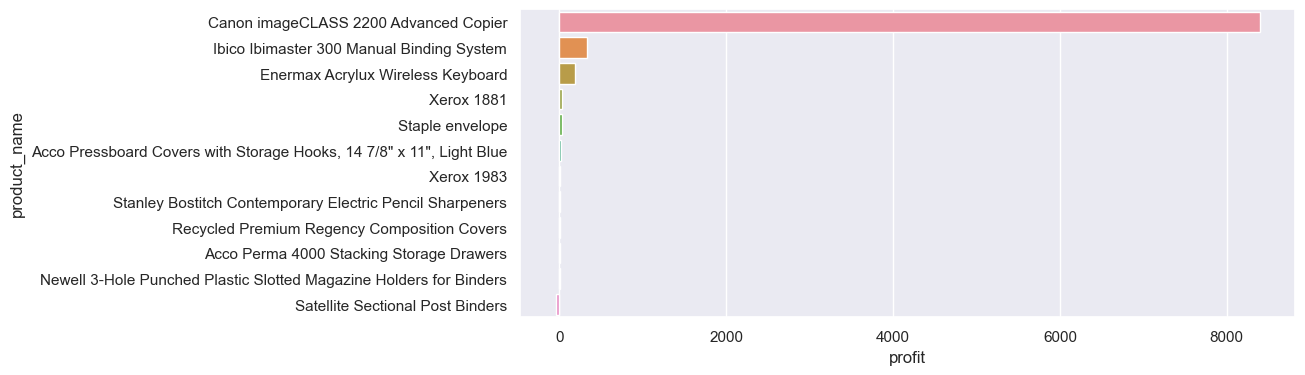

In [340]:
sns.barplot(data=df_product_tamara, x='profit', y='product_name')

Узнали что Canon imageCLASS Самый прибыльный товар, от этого клиента

Посмотрим в каком количестве берет наш клиент эти товары

In [341]:
df_cust_quan=df.query('customer_name=="Tamara Chand"') \
    .groupby('product_name',as_index=False) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity',ascending=False)

In [342]:
df_cust_quan

,product_name,quantity
1,"Acco Pressboard Covers with Storage Hooks, 14 ...",7
2,Canon imageCLASS 2200 Advanced Copier,5
3,Enermax Acrylux Wireless Keyboard,5
10,Xerox 1881,5
11,Xerox 1983,4
7,Satellite Sectional Post Binders,3
9,Staple envelope,3
0,Acco Perma 4000 Stacking Storage Drawers,2
4,Ibico Ibimaster 300 Manual Binding System,2
5,Newell 3-Hole Punched Plastic Slotted Magazine...,2


<AxesSubplot:xlabel='quantity', ylabel='product_name'>

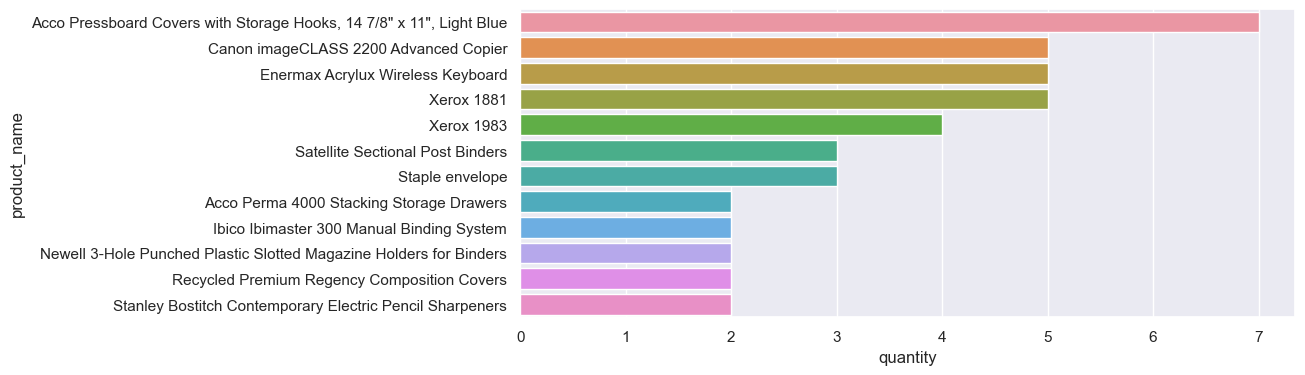

In [343]:
sns.barplot(data=df_cust_quan, x='quantity', y='product_name')

И узнаем что самый покупаемый это - Acco Pressboard Covers

# Итак подведем итоги.

1.Определили Продажи и Прибыльность по городам.

    Выяснили самый прибыльный город, у нас это Нью-Йорк, он с отрывом в 2раза опережает своего предшественника, это наш главный город сбыта товара.
    Узнаем процент прибыльности относительно продаж.
    Выяснили что Lafayette город с самым высоким %прибыли от наших продаж.

2.Узнали соотношение прибыли и продаж по категориям.

    Тут мы увидели что товары в категории - Техники занимает большую часть нашей прибыль в 51%   от всей прибыли, далее идет Офисные принадлежности и уже потом Мебель.
    Хотя глядя на продажи по категориям, мы увидим что Мебель стоит на 2 месте, т.е что эти товары просто менее прибыльны для нас, независимо от их количества.

3.Узнали продукты имеющие большой спрос у клиентов.

    Самый продаваемый товар у нас это Staples - его купили у нас всего - 215 шт.

4.Посмотрели какие продукты приносят нам больше всего прибыли в абсолютных значениях.

    И это ксерокс от компании Canon imageCLASS 2200 Advanced Copier.

5.И посмотрели обратную сторону.

    Самые убыточные продукты от которых возможно стоило бы и отказаться нам в будущем.
    Нужно быстрее обращать внимание на эти товары, т.к они не дают нашему бизнесу развиваться и приносят лишь убытки.
    Самый убыточный товар для нас это Cubify CubeX 3D Printer Double Head Print.

6.Выяснили самые продаваемые и прибыльные Под-категории, в каком разделе у нас идет большие продажи.

    Определили что копировальные аппараты нам приносят больше всего прибыли, за ними телефоны и аксессуары.

7.Посмотрели на график распределения продаж по месяцам во все года.

    Увидели что в начале года немного идет на спад, к 3-ему месяцу образовался резкий скачок, зачем все примерно устаканилось.
    и к концу года продажи растут, с просадкой только в 10 месяце года. Пиковый месяц по продажам у нас 11 месяц.

8.Определили тенденцию продаж по годам.
    Увидели что с начала 2015 года произошло какое то изменение в компании. 
    Что наши продажи начали расти в несколько раз по отношению к 2014-2015 годам.

9.Посмотрели на прибыльность в каждый месяц в разбивке на года.

    Определили что 2016 году были самый большой скачок прибыли в 10 месяце.
    И что самый неприбыльный месяц оказался 2 месяц 2014 года. 2017 год оказался самым прибыльным, На 173% выросла прибыль относительно 2014 года.
10.Посмотрели насколько влияет наша скидочная программа на продажи.

    Мы увидели что люди больше берут и без скидок, но и большая часть идет со скидкой в 20%.
    Но в сравнении со прибылью и отношения скидки тут дела обстоят иначе, естественно наша прибыль при скидке 0% самая высокая, от количества продаж у нас идет и достаточная прибыль и на 20%.
    Но дальше мы видим что после планки в 20% скидки мы уходим в минус.

11.В общей картине, мы равномерно распределены по сумме продаж между нашими способами доставок.

    Затем мы перешли в способ доставки наших товаров по сегментам и большая часть наших товаров привезена стандартным классом.
    Самая прибыльный способ доставки на 1 единицу товара идет первым классом, он составляет 8.6$ за штуку.
    Самый меньший способ идет стандартный но он выигрывает за счёт своего количества продаж, т.к в абсолютный значения всего он выигрывает и выходит на первую строчку по прибыльности.
12.Смотрим в соотношение наших покупателей от региона, Где у нас больше всего покупателей.

    Мы видим что на 1 месте идет Западная часть, на 2 месте Восток.
    Самым малым по количеству клиентов оказалась Южная часть, так же смотрим и на прибыль ситуация такая же, лидеры не изменились но изменилось их соотношение в прибыли.
    Самым прибыльным регионом оказалась Западная  часть.

13.Тут я решил узнать а кто вообще из наших уже покупателей чаще покупает и приносит прибыль нашей компании.

    Так если мы их определим, сможем подталкивать их на большие покупки или предоставить наши системы лояльности для пользователей.
    И так выяснилось что Tamara Chand - это наш самый прибыльный покупатель. Узнали что наш покупатель делает покупки в разных городах, и что есть для нас там и город с отрицательной прибылью.
    Чаще покупатель наш брал товар - Acco Pressboard Covers with Storage Hooks. но самым прибыльным товаром от этого покупателя нам вышел ксерокс Canon.
    На фоне этой информации мы можем строить к примеру рекомендательные модели для наших пользователей, тут лишь узнали в разрезе на определенного покупателя.
